# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [29]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "Korea.png"

### 데이터 입력

In [31]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("KoreaSummit_Moon.txt", 'r', encoding='euc-kr')
message_of_moon = f.read()
print(message_of_moon)
f.close()

존경하는 남과 북의 국민 여러분, 해외 동포 여러분. 김정은 위원장과 나는 평화를 바라는 8천만 겨레의 염원으로 역사적인 만남을 갖고 귀중한 합의를 이루었습니다. 한반도에 더 이상 전쟁은 없을 것이며 새로운 평화의 시대가 열리고 있음을 함께 선언하였습니다. 긴 세월 동안 분단의 아픔과 서러움 속에서도 끝내 극복할 수 있다고 믿었기에 우리는 이 자리에 설 수 있었습니다.

오늘 김정은 위원장과 나는 완전한 비핵화를 통해 핵 없는 한반도를 실현하는 것이 우리의 공동 목표라는 것을 확인했습니다.

북측이 먼저 취한 핵 동결 조치들은 대단히 중대한 의미를 가지고 있습니다. 한반도의 완전한 비핵화를 위한 소중한 출발이 될 것입니다. 앞으로 완전한 비핵화를 위해 남과 북이 더욱 긴밀히 협력해 나갈 것을 분명히 밝힙니다.

우리는 또한 종전선언과 평화협정을 통해 한반도의 불안정한 정전 체제를 종식시키고 항구적이고 공고한 평화체제를 구축해나가기로 합의했습니다. 한반도를 둘러싼 국제 질서를 근본적으로 바꿀 수 있는 매우 중요한 합의입니다.

이제 우리가 사는 땅, 하늘, 바다, 어디에서도 서로에 대한 일체의 적대행위를 하지 않을 것입니다. 우발적인 충돌을 막을 근본 대책들도 강구해나갈 것입니다. 한반도를 가로지르고 있는 비무장 지대는 실질적인 평화지대가 될 것입니다.

서해 북방한계선 일대를 평화수역으로 만들어 우발적인 군사적 충돌을 방지하고 남북 어민들의 안전한 어로 활동을 보장할 것입니다. 나는 대담하게 오늘의 상황을 만들어내고 통 큰 합의에 동의한 김정은 위원장의 용기와 결단에 경의를 표합니다.

우리는 주도적으로 우리 민족의 운명을 결정해 나가되 국제사회의 지지와 협력을 위해 함께 노력하기로 했습니다. 김정은 위원장과 나는 서로에 대한 굳건한 믿음으로 평화와 번영, 통일을 위해 정기적인 회담과 직통전화를 통해 수시로 논의할 것입니다.

이제 우리는 결코 뒤돌아 가지 않을 것입니다. 존경하는 남북의 국민 여러분, 해외 동포 여러분, 나는 김정은 위원장과 함께 남북 모두의

In [32]:
# 연설문2
# 아래 speech.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("KoreaSummit_Kim.txt", 'r', encoding='euc-kr')
message_of_kim = f.read()
print(message_of_kim)
f.close()

Well you only need the light when it's burning low 
Only miss the sun when it starts to snow 
Only know you love her when you let her go 
Only know you've been high when you're feeling low 
Only hate the road when you're missing home 
Only know you love her when you let her go 
And you let her go 

Staring at the bottom of your glass 
Hoping one day you'll make a dream last 
But dreams come slow and they go so fast 
You see her when you close your eyes 
Maybe one day you'll understand why 
Everything you touch surely dies 

But you only need the light when it's burning low 
Only miss the sun when it starts to snow 
Only know you love her when you let her go 
Only know you've been high when you're feeling low 
Only hate the road when you're missing home 
Only know you love her when you let her go 

Staring at the ceiling in the dark 
Same old empty feeling in your heart 
'Cause love comes slow and it goes so fast 
Well you see her when you fall asleep 
But never to touch and never to ke

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [33]:
# 연설문 1번 전처리
message_of_moon = message_of_moon.split('\n\n')
message_of_moon

['존경하는 남과 북의 국민 여러분, 해외 동포 여러분. 김정은 위원장과 나는 평화를 바라는 8천만 겨레의 염원으로 역사적인 만남을 갖고 귀중한 합의를 이루었습니다. 한반도에 더 이상 전쟁은 없을 것이며 새로운 평화의 시대가 열리고 있음을 함께 선언하였습니다. 긴 세월 동안 분단의 아픔과 서러움 속에서도 끝내 극복할 수 있다고 믿었기에 우리는 이 자리에 설 수 있었습니다.',
 '오늘 김정은 위원장과 나는 완전한 비핵화를 통해 핵 없는 한반도를 실현하는 것이 우리의 공동 목표라는 것을 확인했습니다.',
 '북측이 먼저 취한 핵 동결 조치들은 대단히 중대한 의미를 가지고 있습니다. 한반도의 완전한 비핵화를 위한 소중한 출발이 될 것입니다. 앞으로 완전한 비핵화를 위해 남과 북이 더욱 긴밀히 협력해 나갈 것을 분명히 밝힙니다.',
 '우리는 또한 종전선언과 평화협정을 통해 한반도의 불안정한 정전 체제를 종식시키고 항구적이고 공고한 평화체제를 구축해나가기로 합의했습니다. 한반도를 둘러싼 국제 질서를 근본적으로 바꿀 수 있는 매우 중요한 합의입니다.',
 '이제 우리가 사는 땅, 하늘, 바다, 어디에서도 서로에 대한 일체의 적대행위를 하지 않을 것입니다. 우발적인 충돌을 막을 근본 대책들도 강구해나갈 것입니다. 한반도를 가로지르고 있는 비무장 지대는 실질적인 평화지대가 될 것입니다.',
 '서해 북방한계선 일대를 평화수역으로 만들어 우발적인 군사적 충돌을 방지하고 남북 어민들의 안전한 어로 활동을 보장할 것입니다. 나는 대담하게 오늘의 상황을 만들어내고 통 큰 합의에 동의한 김정은 위원장의 용기와 결단에 경의를 표합니다.',
 '우리는 주도적으로 우리 민족의 운명을 결정해 나가되 국제사회의 지지와 협력을 위해 함께 노력하기로 했습니다. 김정은 위원장과 나는 서로에 대한 굳건한 믿음으로 평화와 번영, 통일을 위해 정기적인 회담과 직통전화를 통해 수시로 논의할 것입니다.',
 '이제 우리는 결코 뒤돌아 가지 않을 것입니다. 존경하는 남북의 국민 여러분, 해외 동포 여러분

In [43]:
# 연설문 2번 전처리
message_of_kim = message_of_kim.split('\n\n')
message_of_kim

["Well you only need the light when it's burning low \nOnly miss the sun when it starts to snow \nOnly know you love her when you let her go \nOnly know you've been high when you're feeling low \nOnly hate the road when you're missing home \nOnly know you love her when you let her go \nAnd you let her go ",
 "Staring at the bottom of your glass \nHoping one day you'll make a dream last \nBut dreams come slow and they go so fast \nYou see her when you close your eyes \nMaybe one day you'll understand why \nEverything you touch surely dies ",
 "But you only need the light when it's burning low \nOnly miss the sun when it starts to snow \nOnly know you love her when you let her go \nOnly know you've been high when you're feeling low \nOnly hate the road when you're missing home \nOnly know you love her when you let her go ",
 "Staring at the ceiling in the dark \nSame old empty feeling in your heart \n'Cause love comes slow and it goes so fast \nWell you see her when you fall asleep \nBut

In [41]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_moon)
tf_bow1 = tf_vectorizer.fit_transform(message_of_moon)
tf_bow1

<13x279 sparse matrix of type '<class 'numpy.int64'>'
	with 356 stored elements in Compressed Sparse Row format>

In [44]:
# 연설문 2번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus2 = tf_vectorizer.fit(message_of_kim)
tf_bow2 = tf_vectorizer.fit_transform(message_of_kim)
tf_bow2

<7x81 sparse matrix of type '<class 'numpy.int64'>'
	with 224 stored elements in Compressed Sparse Row format>

In [46]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

279
279


['and',
 'asleep',
 'at',
 'been',
 'bottom',
 'burning',
 'but',
 'cause',
 'ceiling',
 'close',
 'come',
 'comes',
 'dark',
 'day',
 'deep',
 'dies',
 'dive',
 'dream',
 'dreams',
 'empty',
 'everything',
 'eyes',
 'fall',
 'fast',
 'feeling',
 'glass',
 'go',
 'goes',
 'hate',
 'heart',
 'her',
 'high',
 'home',
 'hoping',
 'in',
 'it',
 'keep',
 'know',
 'last',
 'let',
 'light',
 'll',
 'love',
 'loved',
 'low',
 'make',
 'maybe',
 'miss',
 'missing',
 'much',
 'need',
 'never',
 'no',
 'of',
 'oh',
 'old',
 'one',
 'only',
 're',
 'road',
 'same',
 'see',
 'slow',
 'snow',
 'so',
 'staring',
 'starts',
 'sun',
 'surely',
 'the',
 'they',
 'to',
 'too',
 'touch',
 'understand',
 've',
 'well',
 'when',
 'why',
 'you',
 'your']

In [45]:
# 연설문 2
# check vocabulary in TDM
print(len(tf_corpus2.vocabulary_))
print(len(tf_corpus2.get_feature_names()))
tf_vectorizer.get_feature_names()

81
81


['and',
 'asleep',
 'at',
 'been',
 'bottom',
 'burning',
 'but',
 'cause',
 'ceiling',
 'close',
 'come',
 'comes',
 'dark',
 'day',
 'deep',
 'dies',
 'dive',
 'dream',
 'dreams',
 'empty',
 'everything',
 'eyes',
 'fall',
 'fast',
 'feeling',
 'glass',
 'go',
 'goes',
 'hate',
 'heart',
 'her',
 'high',
 'home',
 'hoping',
 'in',
 'it',
 'keep',
 'know',
 'last',
 'let',
 'light',
 'll',
 'love',
 'loved',
 'low',
 'make',
 'maybe',
 'miss',
 'missing',
 'much',
 'need',
 'never',
 'no',
 'of',
 'oh',
 'old',
 'one',
 'only',
 're',
 'road',
 'same',
 'see',
 'slow',
 'snow',
 'so',
 'staring',
 'starts',
 'sun',
 'surely',
 'the',
 'they',
 'to',
 'too',
 'touch',
 'understand',
 've',
 'well',
 'when',
 'why',
 'you',
 'your']

In [47]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['10', '8천만', '가로지르고', '가지', '가지고', '각각', '각계각층의', '감사합니다', '강구해나갈', '갖고', '개성에', '것도', '것으로', '것은', '것을', '것이', '것이며', '것입니다', '겨레의', '결단에', '결단으로', '결정을', '결정해', '결코', '경의를', '경협사업의', '고향을', '공고한', '공동', '공동발표를', '공동연락사무소를', '공동의', '교류와', '교환할', '구축해나가기로', '국민', '국민들과', '국제', '국제사회의', '군사적', '굳건한', '귀중한', '극복할', '근본', '근본적으로', '기대합니다', '긴밀히', '길로', '김정은', '끝내', '나가되', '나갈', '나는', '남과', '남북', '남북공동조사', '남북의', '내려준', '노력하기로', '논의할', '늦기', '다양한', '단합을', '담대한', '당국자가', '당국자들은', '대단히', '대담하게', '대담하고', '대책들도', '대한', '대화하고', '더욱', '동결', '동안', '동의한', '동포', '되면', '되었습니다', '두는', '둘러싼', '뒤돌아', '드릴', '또한', '막을', '만남을', '만남이', '만들어', '만들어내고', '매우', '먼저', '모두의', '목표라는', '민족', '민족의', '민족적', '믿었기에', '믿음으로', '바꿀', '바다', '바라는', '박수를', '발걸음을', '발전해', '발표', '밝힙니다', '방문하고', '방식도', '방지하고', '번영', '번영과', '보냅니다', '보장할', '북방한계선', '북의', '북이', '북측의', '북측이', '분단의', '분명히', '불안정한', '비무장', '비핵화를', '비핵화와', '사는', '사상', '상대방', '상주하는', '상황을', '새로운', '서러움', '서로에', '서서', '서신을', '서해', '선물을', '선언하였습니다', '설치하기로', '세계에', '세계

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  2,  1,  2,
       11,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  8,  1,  1,
        1,  6,  4,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  3,  1,  1,  1,  1,
        1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,  1,  1,
        1,  1,  1,  2,  2,  3,  1,  1,  1,  1,  4,  2,  2,  1,  5,  1,  2,
        2,  5,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  3,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  2,  1,  1

In [48]:
# 연설문 2
# frequency count
tf_word_sum2 = tf_bow2.toarray().sum(axis=0)
tf_word_name2 = tf_corpus2.get_feature_names()
tf_word_dict2 = {}

for i in range(len(tf_word_sum2)):
    tf_word_dict2[tf_word_name2[i]] = tf_word_sum2[i]
    
print(tf_corpus2.get_feature_names())
tf_word_sum2

['and', 'asleep', 'at', 'been', 'bottom', 'burning', 'but', 'cause', 'ceiling', 'close', 'come', 'comes', 'dark', 'day', 'deep', 'dies', 'dive', 'dream', 'dreams', 'empty', 'everything', 'eyes', 'fall', 'fast', 'feeling', 'glass', 'go', 'goes', 'hate', 'heart', 'her', 'high', 'home', 'hoping', 'in', 'it', 'keep', 'know', 'last', 'let', 'light', 'll', 'love', 'loved', 'low', 'make', 'maybe', 'miss', 'missing', 'much', 'need', 'never', 'no', 'of', 'oh', 'old', 'one', 'only', 're', 'road', 'same', 'see', 'slow', 'snow', 'so', 'staring', 'starts', 'sun', 'surely', 'the', 'they', 'to', 'too', 'touch', 'understand', 've', 'well', 'when', 'why', 'you', 'your']


array([ 8,  1,  2,  5,  1,  5,  3,  4,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  6,  1, 16,  1,  5,  1, 28,  5,  5,  1,
        2, 11,  1, 15,  1, 15,  5,  2, 11,  1, 10,  1,  1,  5,  5,  1,  5,
        2,  2,  1,  6,  1,  2, 30, 10,  5,  1,  2,  2,  5,  2,  2,  5,  5,
        1, 18,  1,  7,  2,  2,  1,  5,  4, 32,  1, 54,  3], dtype=int64)

In [49]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'10': 1,
 '8천만': 1,
 '가로지르고': 1,
 '가지': 1,
 '가지고': 1,
 '각각': 1,
 '각계각층의': 1,
 '감사합니다': 1,
 '강구해나갈': 1,
 '갖고': 1,
 '개성에': 1,
 '것도': 1,
 '것으로': 2,
 '것은': 1,
 '것을': 2,
 '것이': 1,
 '것이며': 2,
 '것입니다': 11,
 '겨레의': 1,
 '결단에': 1,
 '결단으로': 1,
 '결정을': 1,
 '결정해': 1,
 '결코': 1,
 '경의를': 1,
 '경협사업의': 1,
 '고향을': 1,
 '공고한': 1,
 '공동': 2,
 '공동발표를': 1,
 '공동연락사무소를': 1,
 '공동의': 1,
 '교류와': 1,
 '교환할': 1,
 '구축해나가기로': 1,
 '국민': 2,
 '국민들과': 1,
 '국제': 1,
 '국제사회의': 1,
 '군사적': 1,
 '굳건한': 1,
 '귀중한': 1,
 '극복할': 1,
 '근본': 1,
 '근본적으로': 1,
 '기대합니다': 1,
 '긴밀히': 2,
 '길로': 1,
 '김정은': 8,
 '끝내': 1,
 '나가되': 1,
 '나갈': 1,
 '나는': 6,
 '남과': 4,
 '남북': 5,
 '남북공동조사': 1,
 '남북의': 1,
 '내려준': 1,
 '노력하기로': 1,
 '논의할': 1,
 '늦기': 1,
 '다양한': 1,
 '단합을': 1,
 '담대한': 1,
 '당국자가': 1,
 '당국자들은': 1,
 '대단히': 1,
 '대담하게': 1,
 '대담하고': 1,
 '대책들도': 1,
 '대한': 2,
 '대화하고': 1,
 '더욱': 1,
 '동결': 1,
 '동안': 1,
 '동의한': 1,
 '동포': 2,
 '되면': 1,
 '되었습니다': 1,
 '두는': 1,
 '둘러싼': 1,
 '뒤돌아': 1,
 '드릴': 1,
 '또한': 2,
 '막을': 1,
 '만남을': 1,
 '만남이': 1,
 '만들어': 1,
 '만들어내고': 1,
 '매우

In [50]:
# 연설문 2
# 단어별 글자수 확인
tf_word_dict2

{'and': 8,
 'asleep': 1,
 'at': 2,
 'been': 5,
 'bottom': 1,
 'burning': 5,
 'but': 3,
 'cause': 4,
 'ceiling': 1,
 'close': 1,
 'come': 1,
 'comes': 1,
 'dark': 1,
 'day': 2,
 'deep': 1,
 'dies': 1,
 'dive': 1,
 'dream': 1,
 'dreams': 1,
 'empty': 1,
 'everything': 1,
 'eyes': 1,
 'fall': 1,
 'fast': 2,
 'feeling': 6,
 'glass': 1,
 'go': 16,
 'goes': 1,
 'hate': 5,
 'heart': 1,
 'her': 28,
 'high': 5,
 'home': 5,
 'hoping': 1,
 'in': 2,
 'it': 11,
 'keep': 1,
 'know': 15,
 'last': 1,
 'let': 15,
 'light': 5,
 'll': 2,
 'love': 11,
 'loved': 1,
 'low': 10,
 'make': 1,
 'maybe': 1,
 'miss': 5,
 'missing': 5,
 'much': 1,
 'need': 5,
 'never': 2,
 'no': 2,
 'of': 1,
 'oh': 6,
 'old': 1,
 'one': 2,
 'only': 30,
 're': 10,
 'road': 5,
 'same': 1,
 'see': 2,
 'slow': 2,
 'snow': 5,
 'so': 2,
 'staring': 2,
 'starts': 5,
 'sun': 5,
 'surely': 1,
 'the': 18,
 'they': 1,
 'to': 7,
 'too': 2,
 'touch': 2,
 'understand': 1,
 've': 5,
 'well': 4,
 'when': 32,
 'why': 1,
 'you': 54,
 'your': 3}

### 시각화

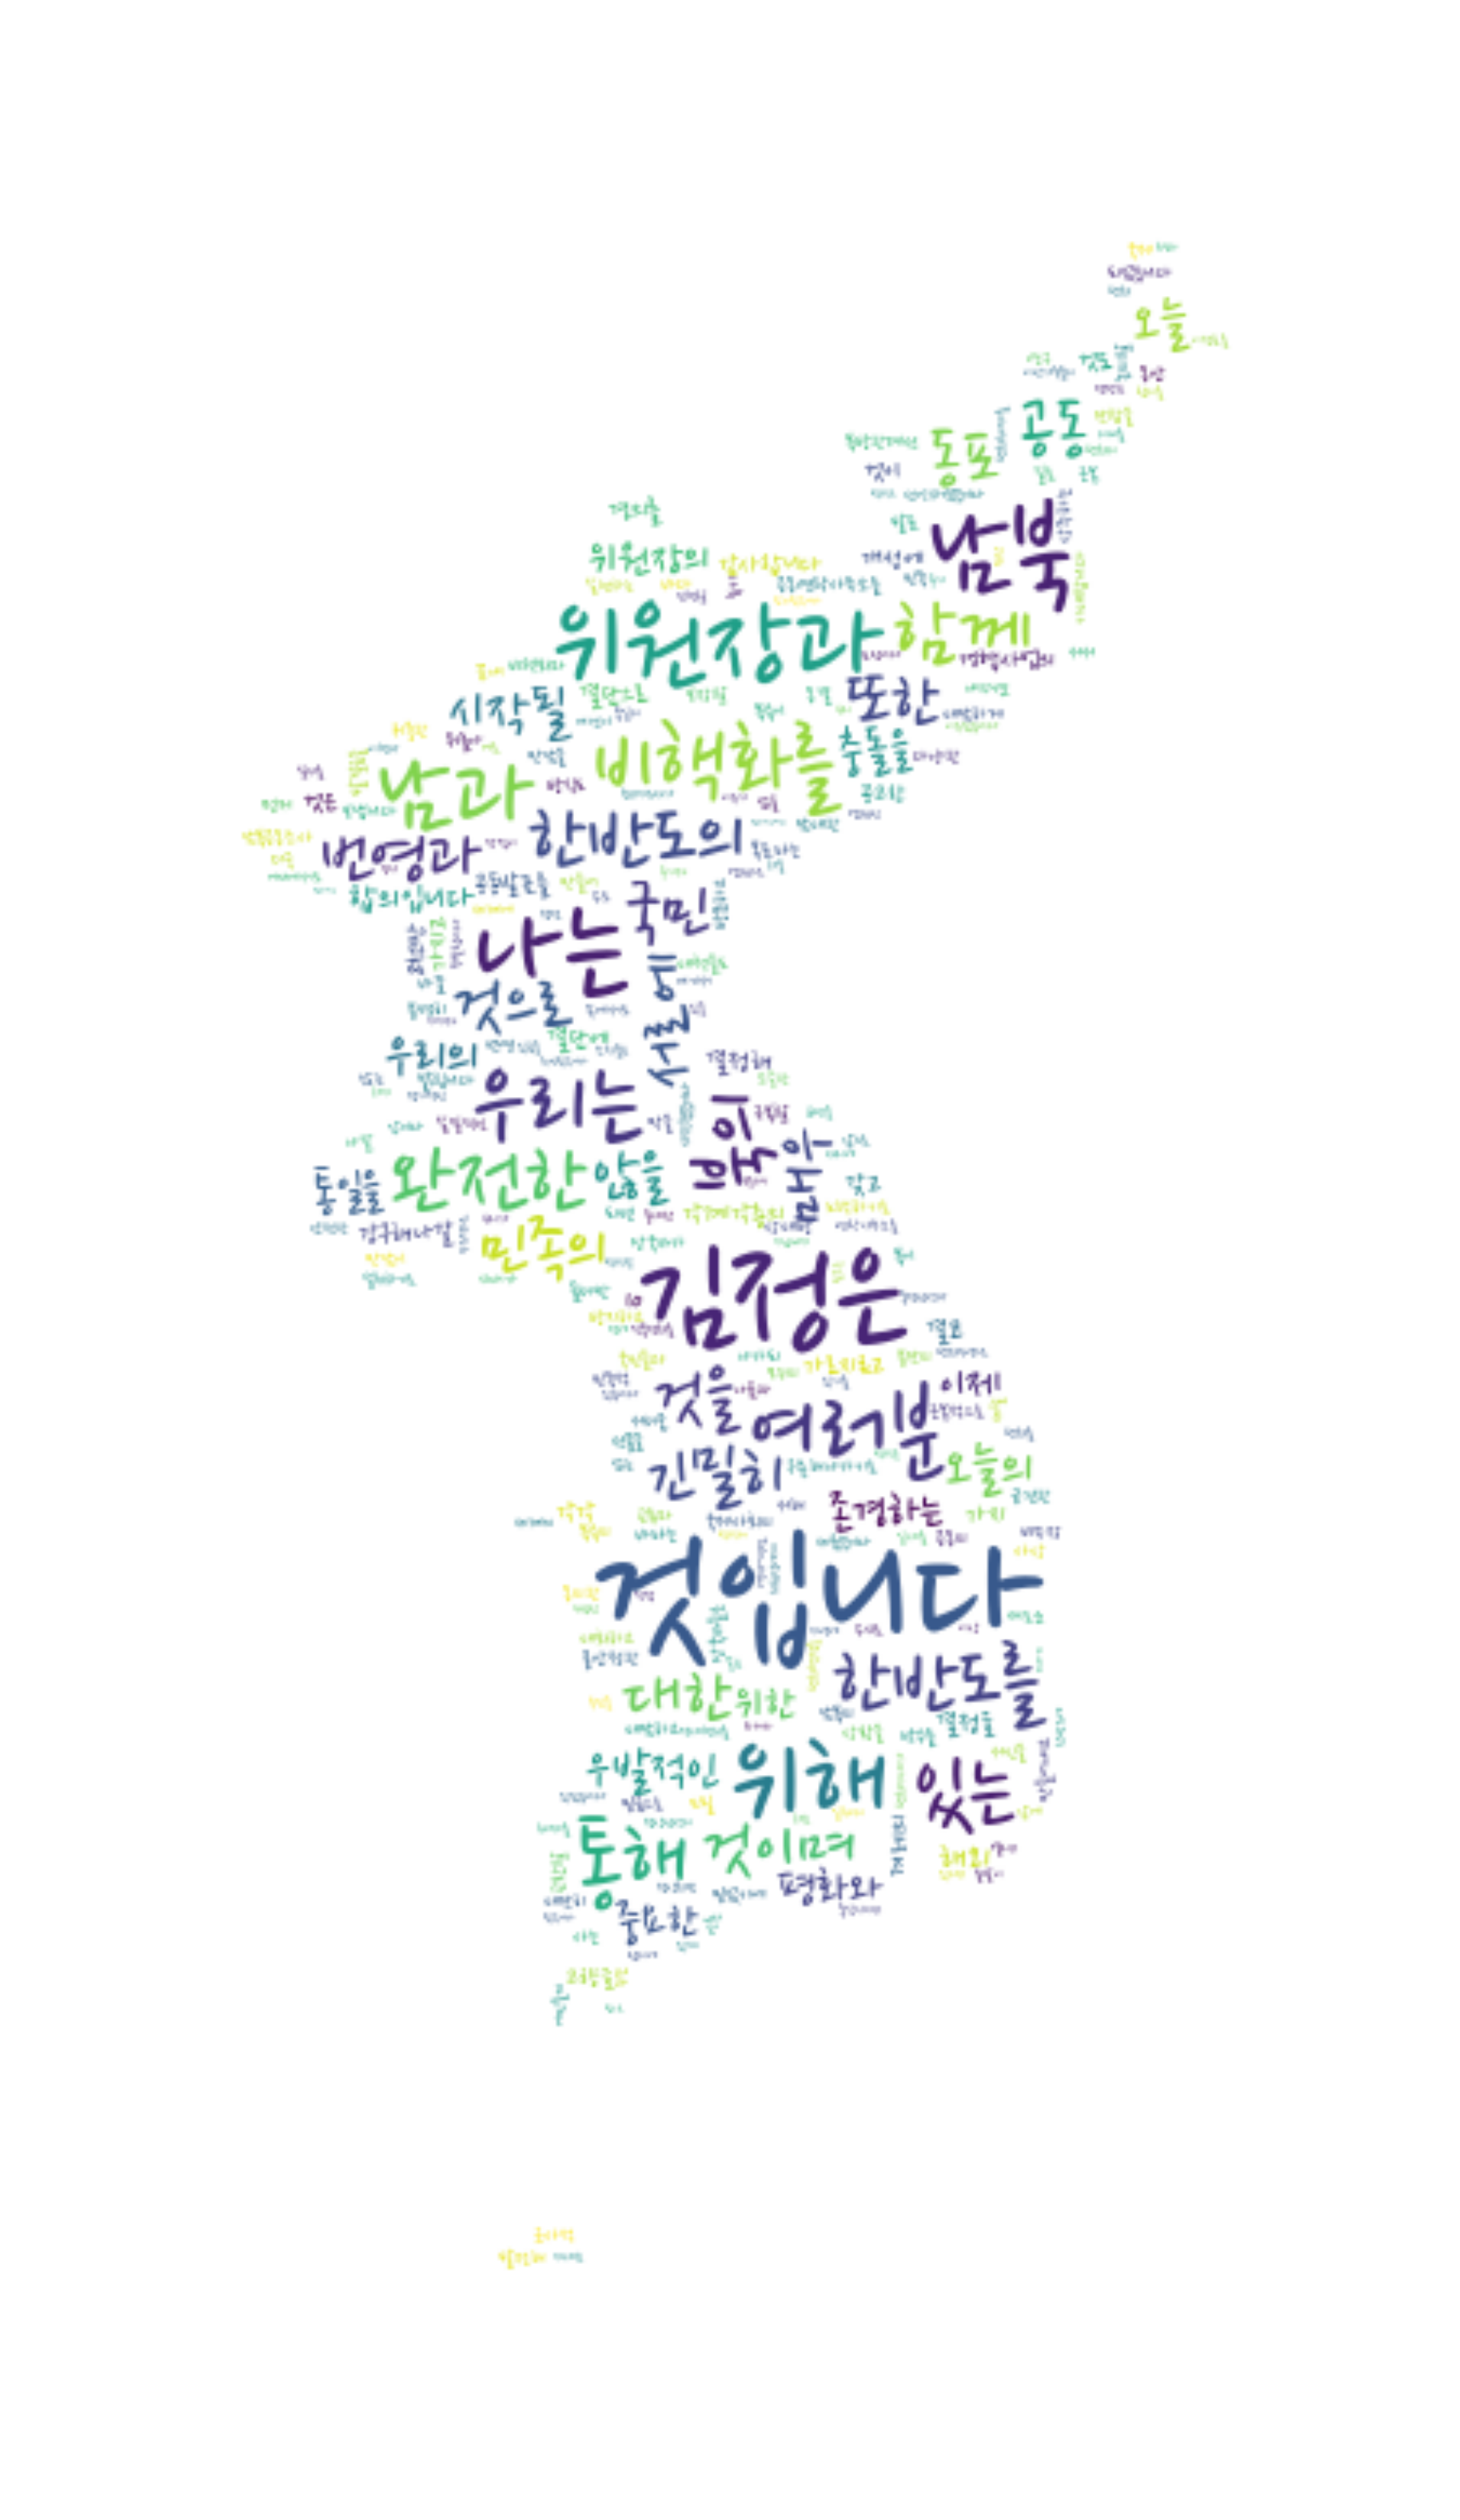

In [51]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("MoonSpeech.png") # 그림파일로 추출하기

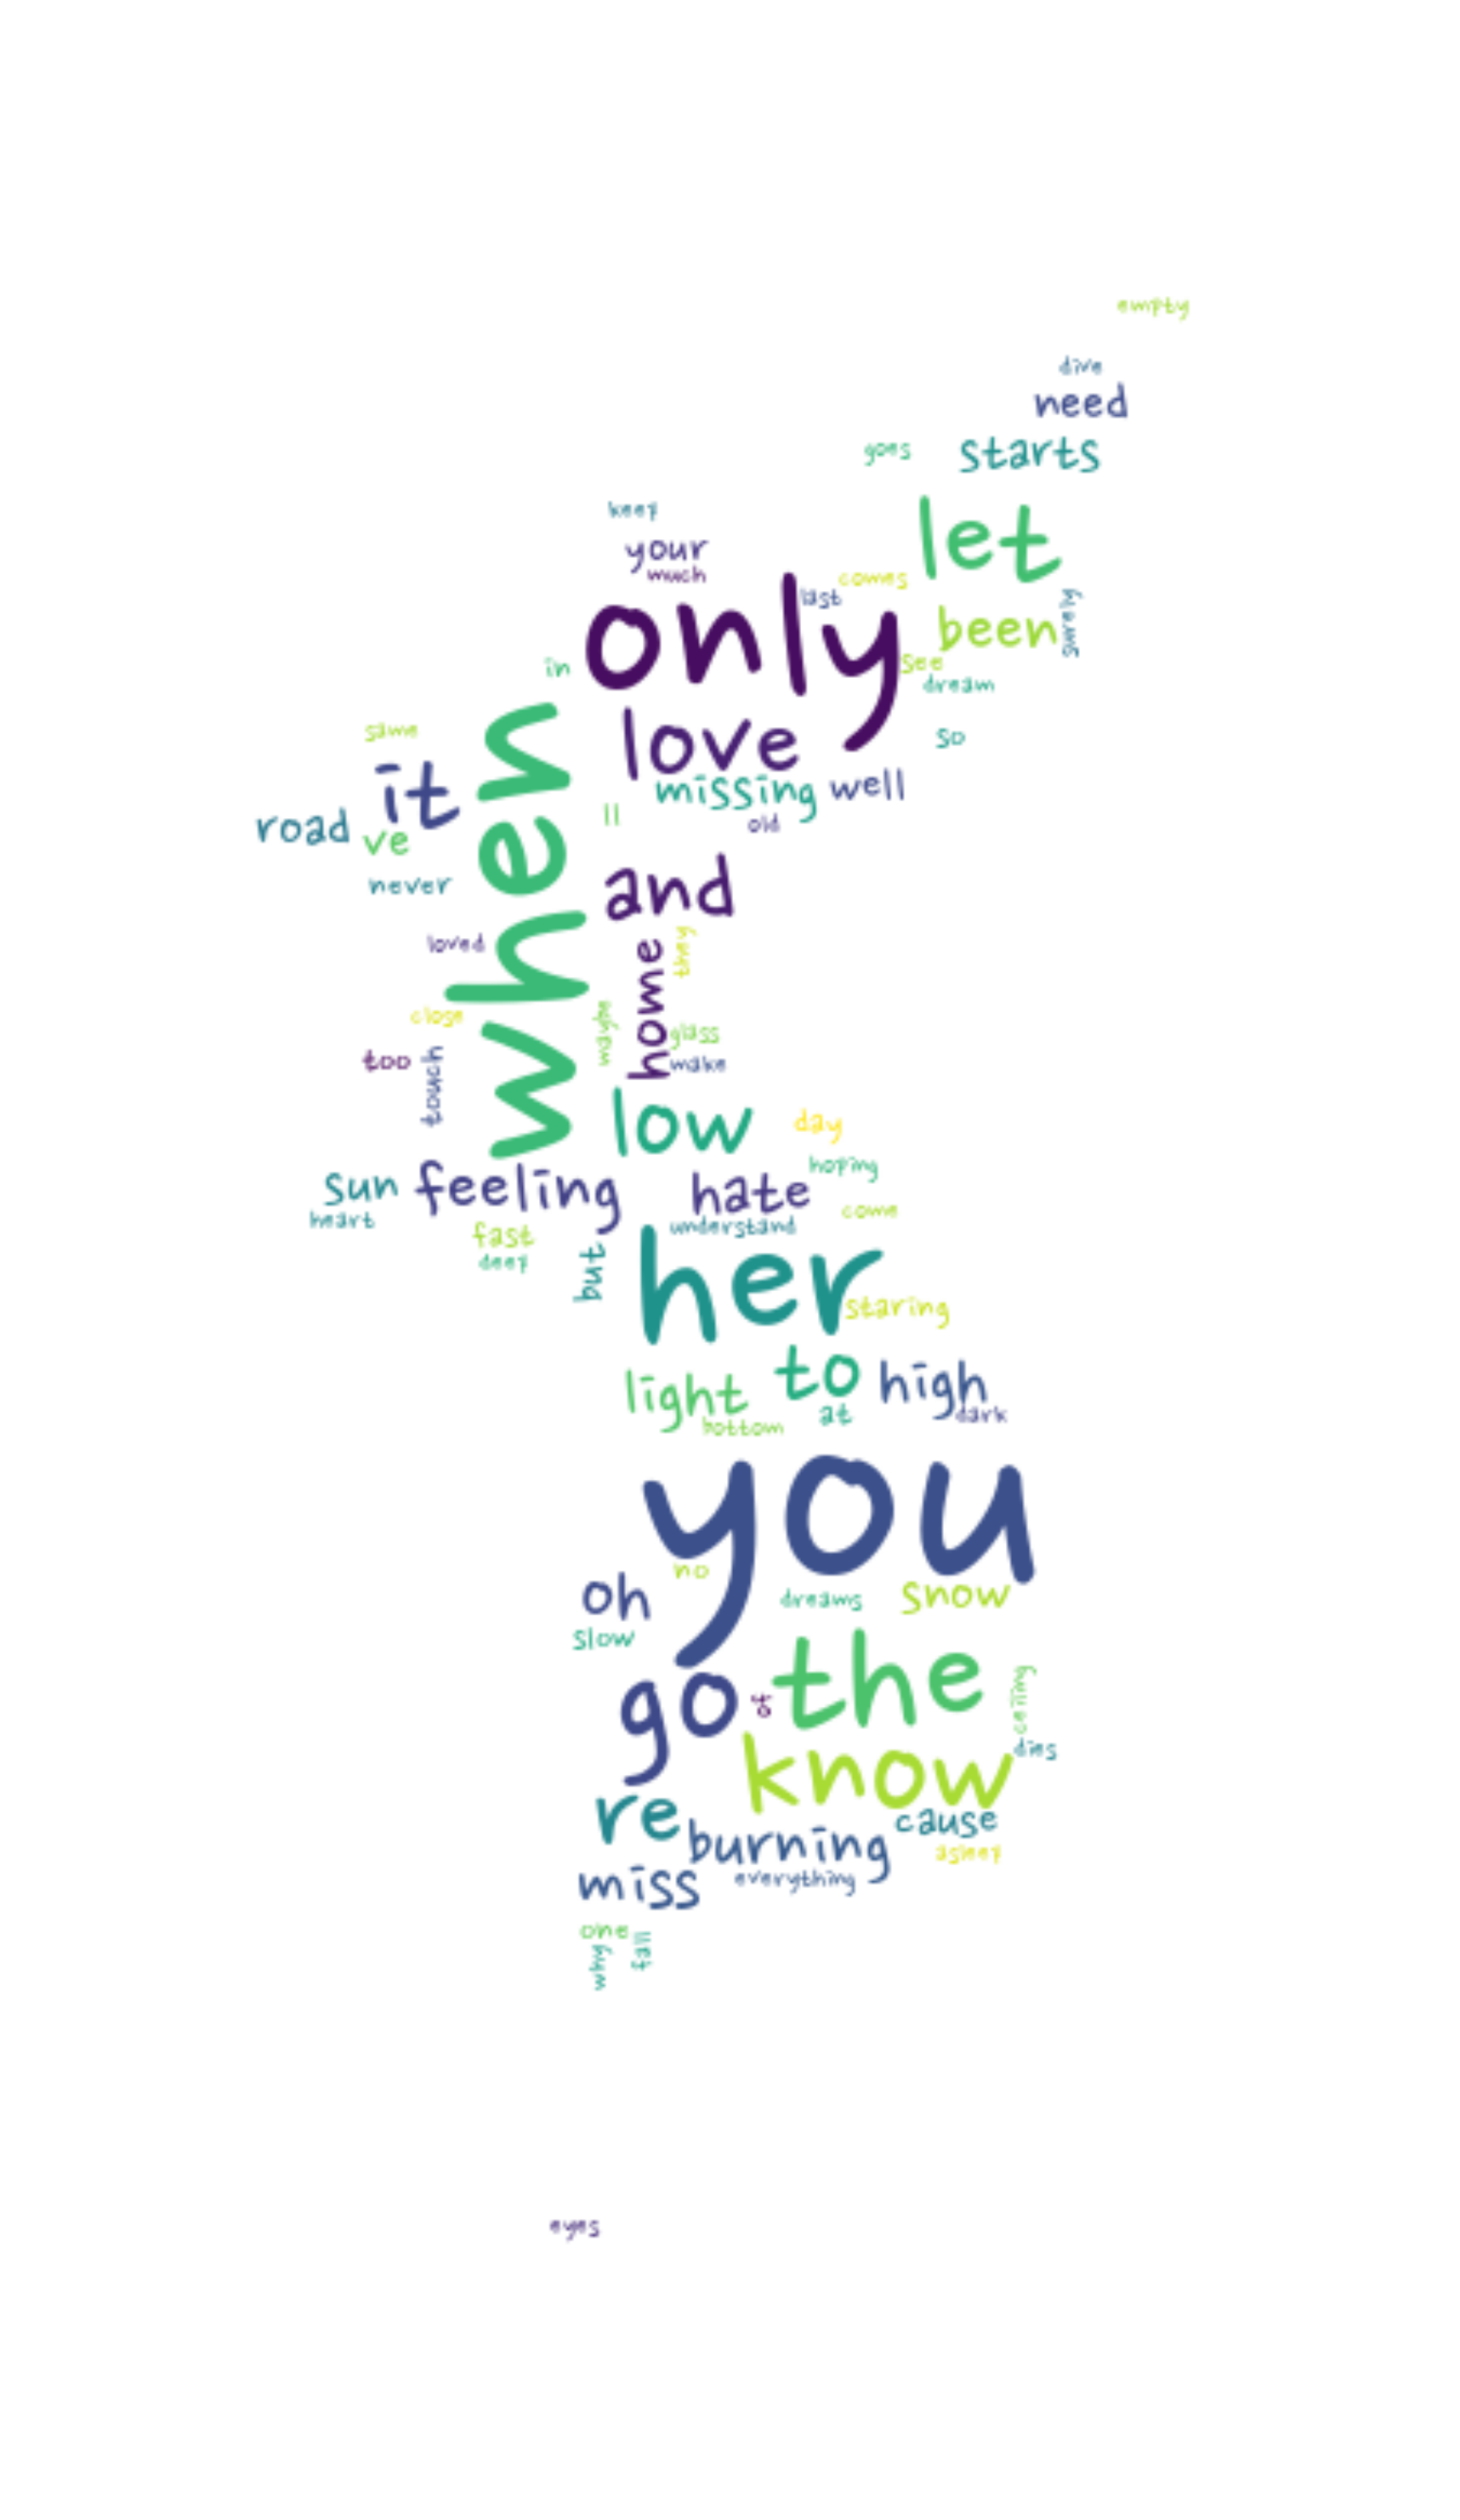

In [52]:
# 연설문 2
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict2)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("KimSpeech.png") # 그림파일로 추출하기